# Data Analysis on Company Financials Dataset.

Dataset : https://www.kaggle.com/datasets/atharvaarya25/financials

In [1]:
#importing the libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading the dataset
data = pd.read_csv('Financials.csv',error_bad_lines=False)

In [3]:
data

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,France,Amarilla,High,"$2,475.00",$260.00,$300.00,"$7,42,500.00","$1,11,375.00","$6,31,125.00","$6,18,750.00","$12,375.00",01/03/2014,3,March,2014
696,Small Business,Mexico,Amarilla,High,$546.00,$260.00,$300.00,"$1,63,800.00","$24,570.00","$1,39,230.00","$1,36,500.00","$2,730.00",01/10/2014,10,October,2014
697,Government,Mexico,Montana,High,"$1,368.00",$5.00,$7.00,"$9,576.00","$1,436.40","$8,139.60","$6,840.00","$1,299.60",01/02/2014,2,February,2014
698,Government,Canada,Paseo,High,$723.00,$10.00,$7.00,"$5,061.00",$759.15,"$4,301.85","$3,615.00",$686.85,01/04/2014,4,April,2014


In [4]:
#checking the number of columns and rows in the data.
print(data.shape)
#checking the various columns in the data
data.columns

(700, 16)


Index(['Segment', 'Country', ' Product ', ' Discount Band ', ' Units Sold ',
       ' Manufacturing Price ', ' Sale Price ', ' Gross Sales ', ' Discounts ',
       '  Sales ', ' COGS ', ' Profit ', 'Date', 'Month Number',
       ' Month Name ', 'Year'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Segment                700 non-null    object
 1   Country                700 non-null    object
 2    Product               700 non-null    object
 3    Discount Band         700 non-null    object
 4    Units Sold            700 non-null    object
 5    Manufacturing Price   700 non-null    object
 6    Sale Price            700 non-null    object
 7    Gross Sales           700 non-null    object
 8    Discounts             700 non-null    object
 9     Sales                700 non-null    object
 10   COGS                  700 non-null    object
 11   Profit                700 non-null    object
 12  Date                   700 non-null    object
 13  Month Number           700 non-null    int64 
 14   Month Name            700 non-null    object
 15  Year                   

In [6]:
#We can clearly see that the column names are distorted with white spaces at inappropriate places
data.columns = data.columns.str.strip() #removing the leading and trailing spaces.

#replacing the spaces between the words with an underscore.
data.columns = data.columns.str.replace(" ","_")

In [7]:
#notice that the date is in object datatype , we must to convert it to date type .
data['Date'] = pd.to_datetime(data['Date'])

In [8]:
#checking for missing values 
data.isna().sum()

Segment                0
Country                0
Product                0
Discount_Band          0
Units_Sold             0
Manufacturing_Price    0
Sale_Price             0
Gross_Sales            0
Discounts              0
Sales                  0
COGS                   0
Profit                 0
Date                   0
Month_Number           0
Month_Name             0
Year                   0
dtype: int64

In [9]:
data.describe(include='object')

,Segment,Country,Product,Discount_Band,Units_Sold,Manufacturing_Price,Sale_Price,Gross_Sales,Discounts,Sales,COGS,Profit,Month_Name
count,700,700,700,700,700,700,700,700,700,700,700,700,700
unique,5,5,6,4,510,6,7,550,515,559,545,557,12
top,Government,Canada,Paseo,High,$727.00,$10.00,$20.00,"$37,050.00",$-,"$20,794.80","$17,430.00",$-,October
freq,300,140,202,245,5,202,100,3,53,2,4,5,140


In [10]:
#making the data uniform in Discount_band column
data['Discount_Band'] = data['Discount_Band'].str.strip()

In [11]:
#removing the $ from all the columns
data.iloc[:,4:12] = (data.iloc[:,4:12]).applymap(str)

In [12]:
# #removing the leading and trailing white space
data.iloc[:,4:12] = data.iloc[:,4:12].applymap(lambda x:x.strip() if isinstance(x,str) else x)

# #removing the dollar signs from the numeric values
data.iloc[:,4:12] = data.iloc[:,4:12].applymap(lambda x:x.replace('$','') if isinstance(x,str) else x)

# #replacing the '-' with 0 in the  dataframe
data.iloc[:,4:12] = data.iloc[:,4:12].applymap(lambda x:x.replace('-','0') if isinstance(x,str) else x)

#replacing the '(' with 0 in the  dataframe
data.iloc[:,4:12] = data.iloc[:,4:12].applymap(lambda x:x.replace('(','') if isinstance(x,str) else x)

#replacing the ')' with 0 in the  dataframe
data.iloc[:,4:12] = data.iloc[:,4:12].applymap(lambda x:x.replace(')','') if isinstance(x,str) else x)

#removing commas from the values
data.iloc[:,4:12] = data.iloc[:,4:12].applymap(lambda x:x.replace(',','') if isinstance(x,str) else x)

In [13]:
# Converting numeric DataFrame columns to float.
data.iloc[:,4:12] = data.iloc[:,4:12].apply(lambda x: x.astype('float64'))

In [14]:
data

,Segment,Country,Product,Discount_Band,Units_Sold,Manufacturing_Price,Sale_Price,Gross_Sales,Discounts,Sales,COGS,Profit,Date,Month_Number,Month_Name,Year
0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,0.00,32370.00,16185.0,16185.00,2014-01-01,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,0.00,26420.00,13210.0,13210.00,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,0.00,32670.00,21780.0,10890.00,2014-01-06,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,0.00,13320.00,8880.0,4440.00,2014-01-06,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,0.00,37050.00,24700.0,12350.00,2014-01-06,6,June,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,France,Amarilla,High,2475.0,260.0,300.0,742500.0,111375.00,631125.00,618750.0,12375.00,2014-01-03,3,March,2014
696,Small Business,Mexico,Amarilla,High,546.0,260.0,300.0,163800.0,24570.00,139230.00,136500.0,2730.00,2014-01-10,10,October,2014
697,Government,Mexico,Montana,High,1368.0,5.0,7.0,9576.0,1436.40,8139.60,6840.0,1299.60,2014-01-02,2,February,2014
698,Government,Canada,Paseo,High,723.0,10.0,7.0,5061.0,759.15,4301.85,3615.0,686.85,2014-01-04,4,April,2014


In [15]:
#calculating total gross segment wise:-
total_gross_dict = {}
for i in data['Segment'].unique() :
    total_gross = 0
    for j in range(len(data['Gross_Sales'])):#performing the total gross group wise   
        if data.loc[j,'Segment'] == i:
            total_gross += data.loc[j,'Gross_Sales']
    total_gross_dict[i] = total_gross

total_gross_dict

{'Government': 56403066.5,
 'Midmarket': 2582670.0,
 'Channel Partners': 1935162.0,
 'Enterprise': 21069000.0,
 'Small Business': 45941700.0}

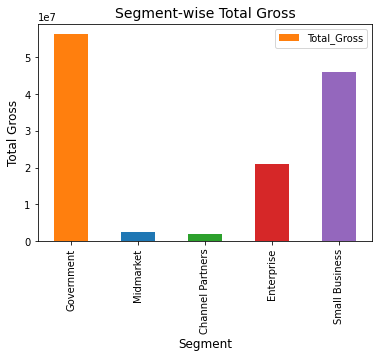

In [17]:
#total gross sales visual depiction
total_gross_df = pd.DataFrame(list(total_gross_dict.items()),columns=['Segment','Total_Gross'])
total_gross_df.plot(x = 'Segment',y='Total_Gross', kind= 'bar',color = ['#ff7f0e','#1f77b4', '#2ca02c', '#d62728', '#9467bd'])

# Add labels and title
plt.xlabel('Segment',fontsize=12)
plt.ylabel('Total Gross',fontsize=12)
plt.title('Segment-wise Total Gross',fontsize=14)

# Show the plot
plt.show()

In [18]:
#Determing highest average sales price segment-wise

seg_cnt = data['Segment'].value_counts()
dict(seg_cnt)

avg_seg_gross = {}
for i in data['Segment'].unique():
    avg_seg_gross[i] = total_gross_dict[i]/seg_cnt[i]
    
highest_seg_avg = [i for i in avg_seg_gross if avg_seg_gross[i] == max(avg_seg_gross.values())][0]

print('Segment with highest average gross = ',highest_seg_avg)

Segment with highest average gross =  Small Business


In [19]:
avg_seg_gross

{'Government': 188010.22166666668,
 'Midmarket': 25826.7,
 'Channel Partners': 19351.62,
 'Enterprise': 210690.0,
 'Small Business': 459417.0}

In [20]:
# Calculate the total sales for each country.
country_total = {}
for i in data['Country'].unique():
    country_sum = 0
    for j in range(len(data['Country'])):
        if i == data.loc[j,'Country']:
            country_sum += data.loc[j,'Sales']
    country_total[i] = country_sum
country_total

{'Canada': 24887654.890000004,
 'Germany': 23505340.82000001,
 'France': 24354172.290000007,
 'Mexico': 20949352.11,
 'United States of America': 25029830.18000001}

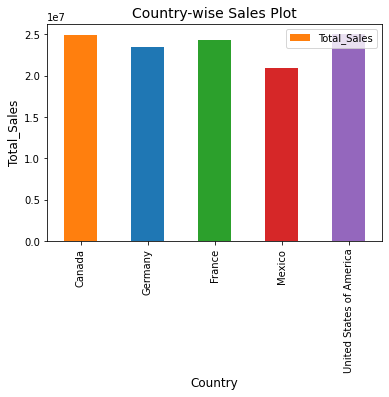

In [21]:
# Visualize country-wise sales using a bar plot.
country_total_df = pd.DataFrame(data = list(country_total.items()),columns=['Country','Total_Sales'])
country_total_df.plot(x = 'Country',y='Total_Sales',kind = 'bar',color = ['#ff7f0e','#1f77b4', '#2ca02c', '#d62728', '#9467bd'])

plt.xlabel('Country',fontsize=12)
plt.ylabel('Total_Sales',fontsize=12)
plt.title('Country-wise Sales Plot',fontsize=14)
plt.show()

In [22]:
# Identify the top 5 countries with the highest units sold. - Check with the ambuiguity 
filt = (data['Sales'].isin(data['Sales'].nlargest(5)))
data.loc[filt,['Country','Sales']]

,Country,Sales
124,Germany,1017338.0
140,Germany,1017338.0
192,United States of America,1159200.0
405,Canada,1038082.5
423,Canada,1035625.5


Why?
•Revenue Assessment

•Profitability Evaluation

•Pricing Strategy Refinement



In [23]:
# Analyze the impact of discounts on gross sales.

# Calculate total sales with discounts
total_sales_with_discounts = data['Gross_Sales'] - data['Discounts']

# Calculate total sales without discounts
total_sales_without_discounts = data['Gross_Sales']


In [24]:
# Calculate average gross sales with discounts
average_sales_with_discounts = total_sales_with_discounts.mean()

# Calculate average gross sales without discounts
average_sales_without_discounts = total_sales_without_discounts.mean()

# Calculate total gross sales for the entire dataset
total_gross_sales = data['Gross_Sales'].sum()


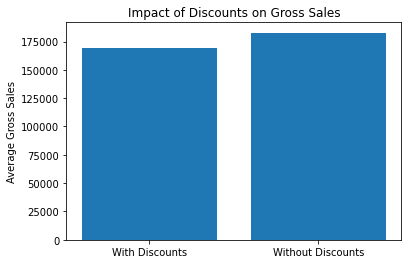

In [25]:
# Create a bar plot to compare average sales with and without discounts
plt.bar(['With Discounts', 'Without Discounts'], [average_sales_with_discounts, average_sales_without_discounts])
plt.title('Impact of Discounts on Gross Sales')
plt.ylabel('Average Gross Sales')
plt.show()


In [26]:
#ask - used chatgpt
from scipy.stats import ttest_ind

# Perform a two-sample t-test
t_statistic, p_value = ttest_ind(total_sales_with_discounts, total_sales_without_discounts)

print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("The difference in average sales is statistically significant.")
else:
    print("The difference in average sales is not statistically significant.")#doubt --> why are they not significant?


T-Statistic: -1.0015052512537008
P-Value: 0.31675591544092924
The difference in average sales is not statistically significant.


In [27]:
# Step 5: Time Series Analysis
# Group the data by year and month to understand sales trends over time.

#grouping the data year wise.
year_grp = data.groupby('Year')
year_dict = {}
for i in data['Year'].unique():
    year_dict[i] = year_grp.get_group(i)


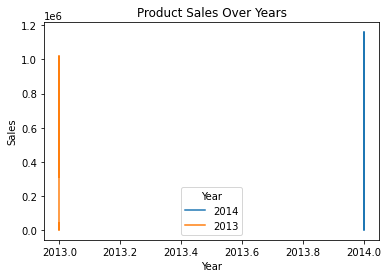

In [28]:
#line chart 

for year, new_df in year_dict.items():
    plt.plot(new_df['Year'],new_df['Sales'],label = str(year))
plt.title('Product Sales Over Years')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend(title='Year')
plt.show()

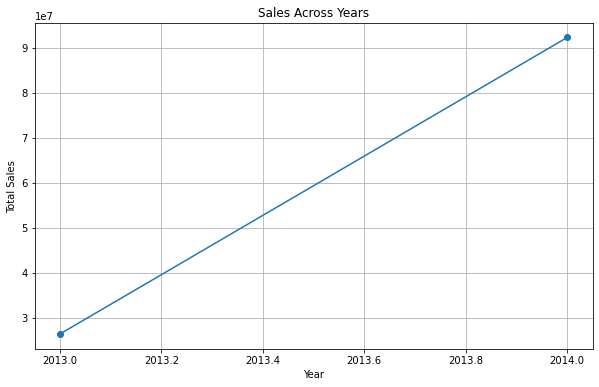

In [29]:
# plt.figure(figsize=(10, 6))
# plt.plot(data['Year'],data['Sales'],linestyle='-')
sales_by_year = data.groupby('Year')['Sales'].sum().reset_index()
# Create line chart
plt.figure(figsize=(10, 6))
plt.plot(sales_by_year['Year'], sales_by_year['Sales'], marker='o')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Sales Across Years')

# Show the plot
plt.grid(True)
plt.show()


In [30]:
#grouping the data month wise.

#correcting the values of month_name column
data['Month_Name'] = data['Month_Name'].apply(lambda x:x.strip())

###NOTE: try checking for duplicate values.

month_grp = data.groupby('Month_Name')
month_dict = {}
for i in data['Month_Name'].unique():
    month_dict[i] = month_grp.get_group(i)


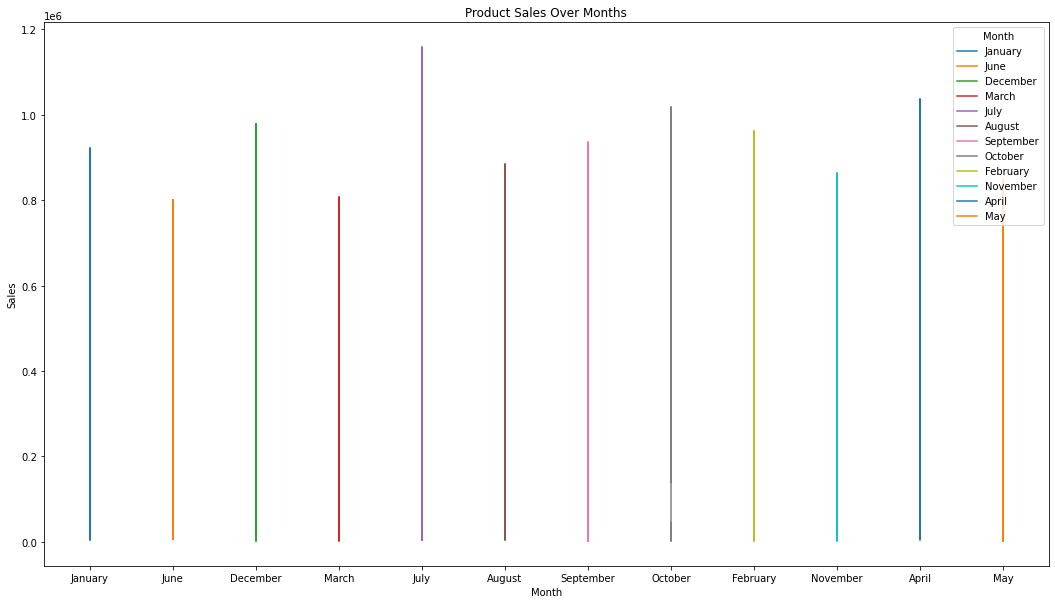

In [31]:
#line chart month
plt.figure(figsize=(18, 10))
for month, new_df in month_dict.items():
    plt.plot(new_df['Month_Name'],new_df['Sales'],label = str(month))
plt.title('Product Sales Over Months')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend(title='Month')
plt.show()
#correct hte figure size

In [32]:
# Step 6: Profit Margin Analysis
# Calculate the profit margin for each row using the formula: (Gross Sales - COGS) / Gross Sales.
profit_margin = (data['Gross_Sales']-data['COGS'])/data['Gross_Sales'] #series
data['Profit_Margin'] = profit_margin

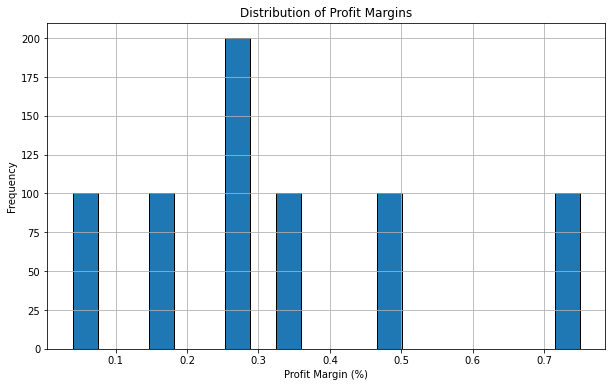

In [33]:
plt.figure(figsize=(10, 6))
plt.hist(data['Profit_Margin'], bins=20, edgecolor='black')
plt.title('Distribution of Profit Margins')
plt.xlabel('Profit Margin (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

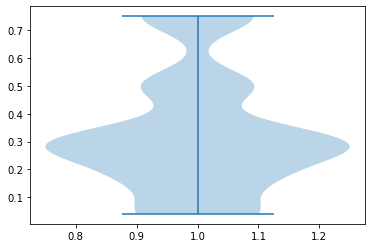

In [34]:
# creating figure and axes to
# plot the image
uniform = list(data['Profit_Margin'])
# Create a figure instance
fig = plt.figure()
  
# Create an axes instance
ax = fig.gca()
# Create the violinplot
violinplot = ax.violinplot(uniform) #check if correct 
plt.show()

In [35]:
import seaborn as sns 

<AxesSubplot:xlabel='Profit_Margin', ylabel='Count'>

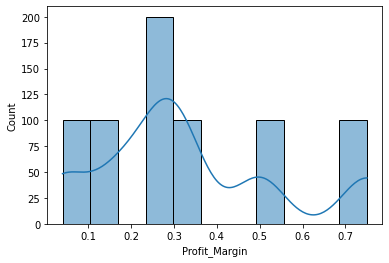

In [36]:
sns.histplot(data.Profit_Margin,kde = True)

<AxesSubplot:>

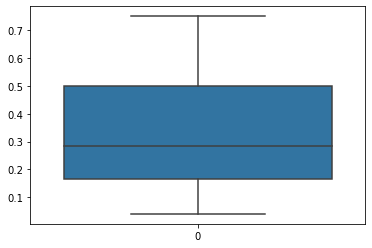

In [37]:
sns.boxplot(data.Profit_Margin)

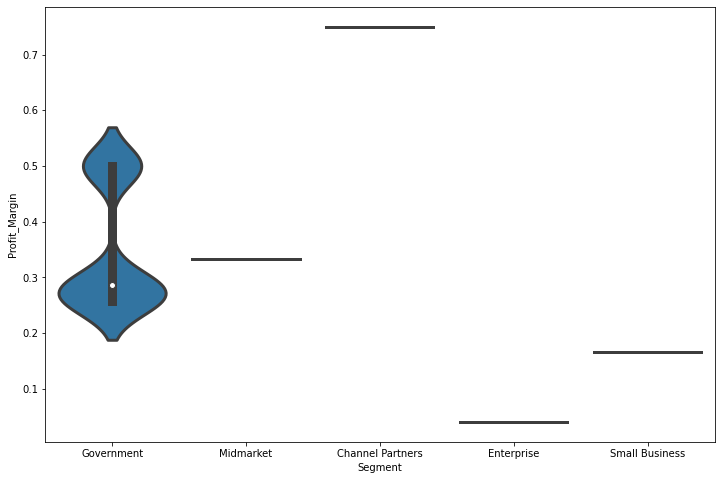

In [38]:
plt.figure(figsize=(12, 8))
sns.violinplot(x="Segment", y="Profit_Margin",data = data,linewidth=3)
plt.show()

# READ THE Automating EDA article book marked on saakshid24 google.

# 

# 2.0

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

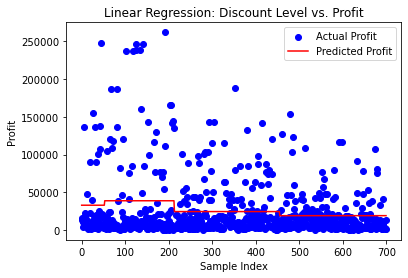

In [40]:
df_encoded = pd.get_dummies(data, columns=['Discount_Band'], prefix=['Discount'])
X = df_encoded[['Discount_None', 'Discount_Low', 'Discount_Medium', 'Discount_High']]
y = data['Profit']
model = LinearRegression()
model.fit(X, y)
coefficients = model.coef_
intercept = model.intercept_
plt.scatter(X.index, y, color='blue', label='Actual Profit')
plt.plot(X.index, model.predict(X), color='red', label='Predicted Profit')
plt.xlabel('Sample Index')
plt.ylabel('Profit')
plt.title('Linear Regression: Discount Level vs. Profit')
plt.legend()
plt.show()


In [41]:
#linear regression using another method
df_encoded = pd.get_dummies(data, columns=['Discount_Band'], prefix=['Discount'])
X = df_encoded[['Discount_None', 'Discount_Low', 'Discount_Medium', 'Discount_High']]
y = data['Profit']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model1 = LinearRegression()
model1.fit(X_train,y_train)

from sklearn.metrics import r2_score
score = r2_score(y_test, model1.predict(X_test))
print(score)

0.02772133656206799


<function matplotlib.pyplot.show(close=None, block=None)>

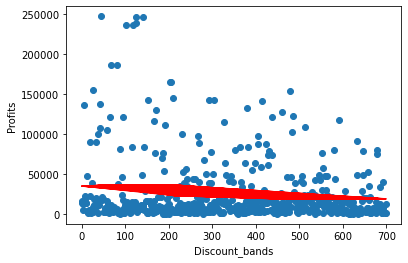

In [42]:
#visualising 
plt.plot(X_train.index,model1.predict(X_train),color='r')
plt.scatter(X_train.index,y_train)
plt.xlabel('Discount_bands')
plt.ylabel('Profits')
plt.show

Clearly , there exists no linear relationship between Discount-Band and Profits

In [43]:
# Product Price vs. Units Sold (Simple Linear Regression)
data

,Segment,Country,Product,Discount_Band,Units_Sold,Manufacturing_Price,Sale_Price,Gross_Sales,Discounts,Sales,COGS,Profit,Date,Month_Number,Month_Name,Year,Profit_Margin
0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,0.00,32370.00,16185.0,16185.00,2014-01-01,1,January,2014,0.500000
1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,0.00,26420.00,13210.0,13210.00,2014-01-01,1,January,2014,0.500000
2,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,0.00,32670.00,21780.0,10890.00,2014-01-06,6,June,2014,0.333333
3,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,0.00,13320.00,8880.0,4440.00,2014-01-06,6,June,2014,0.333333
4,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,0.00,37050.00,24700.0,12350.00,2014-01-06,6,June,2014,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,France,Amarilla,High,2475.0,260.0,300.0,742500.0,111375.00,631125.00,618750.0,12375.00,2014-01-03,3,March,2014,0.166667
696,Small Business,Mexico,Amarilla,High,546.0,260.0,300.0,163800.0,24570.00,139230.00,136500.0,2730.00,2014-01-10,10,October,2014,0.166667
697,Government,Mexico,Montana,High,1368.0,5.0,7.0,9576.0,1436.40,8139.60,6840.0,1299.60,2014-01-02,2,February,2014,0.285714
698,Government,Canada,Paseo,High,723.0,10.0,7.0,5061.0,759.15,4301.85,3615.0,686.85,2014-01-04,4,April,2014,0.285714


In [44]:
#DOUBT DECIDING WHICH ONE SHOULD BE X AND WHICH ONE SHOULD BE Y

In [45]:
model2 = LinearRegression()
X = np.array(data[['Sale_Price']])
y = np.array(data['Units_Sold'])
model2.fit(X,y)
coefficients = model2.coef_
intercept = model2.intercept_

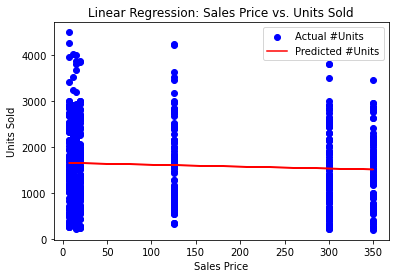

In [46]:
plt.scatter(X, y, color='blue', label='Actual #Units')
plt.plot(X, model2.predict(X), color='red', label='Predicted #Units')
plt.xlabel('Sales Price')
plt.ylabel('Units Sold')
plt.title('Linear Regression: Sales Price vs. Units Sold')
plt.legend()
plt.show()

Clearly , no linear relation found

# Month vs. Gross Sales (Polynomial Regression)


In [72]:
data

,Segment,Country,Product,Discount_Band,Units_Sold,Manufacturing_Price,Sale_Price,Gross_Sales,Discounts,Sales,COGS,Profit,Date,Month_Number,Month_Name,Year,Profit_Margin
0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,0.00,32370.00,16185.0,16185.00,2014-01-01,1,January,2014,0.500000
1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,0.00,26420.00,13210.0,13210.00,2014-01-01,1,January,2014,0.500000
2,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,0.00,32670.00,21780.0,10890.00,2014-01-06,6,June,2014,0.333333
3,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,0.00,13320.00,8880.0,4440.00,2014-01-06,6,June,2014,0.333333
4,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,0.00,37050.00,24700.0,12350.00,2014-01-06,6,June,2014,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,France,Amarilla,High,2475.0,260.0,300.0,742500.0,111375.00,631125.00,618750.0,12375.00,2014-01-03,3,March,2014,0.166667
696,Small Business,Mexico,Amarilla,High,546.0,260.0,300.0,163800.0,24570.00,139230.00,136500.0,2730.00,2014-01-10,10,October,2014,0.166667
697,Government,Mexico,Montana,High,1368.0,5.0,7.0,9576.0,1436.40,8139.60,6840.0,1299.60,2014-01-02,2,February,2014,0.285714
698,Government,Canada,Paseo,High,723.0,10.0,7.0,5061.0,759.15,4301.85,3615.0,686.85,2014-01-04,4,April,2014,0.285714


In [75]:
X = np.array(data['Month_Number']).reshape(-1,1)
y = np.array(data['Gross_Sales'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [76]:
#applying polynomial transformation 
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2,include_bias=True)
X_train_poly = poly.fit_transform(X_train.reshape(-1,1)) #fir transform only takes reference for traindata
X_test_poly = poly.transform(X_test)

In [77]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly,y_train)
y_pred = regression.predict(X_test_poly)
score = r2_score(y_test,y_pred)
print(score)

-0.015014092295736692


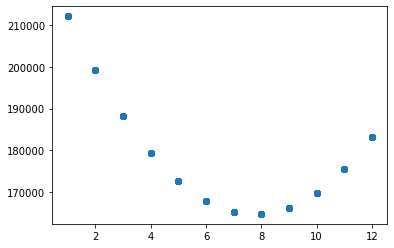

In [78]:
plt.scatter(X_train,regression.predict(X_train_poly))

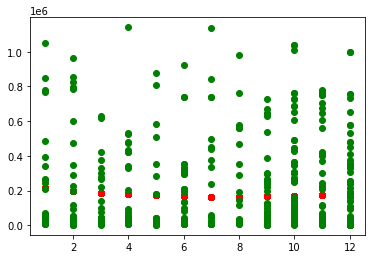

In [79]:
plt.scatter(X_train,regression.predict(X_train_poly),color = 'r')
plt.scatter(X_train,y_train,color = 'g')

# LOGISTIC REGRESSION

In [50]:
#importing the libraries
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
# Dummy encode categorical variables
df_encoded = pd.get_dummies(data=data, columns=['Segment', 'Country'], drop_first=True)

# Define X and y
X = df_encoded.drop('Profit', axis=1)
y = df_encoded['Profit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression pipeline
model = Pipeline([
    ('classifier', LogisticRegression())
])

# Fit the model
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Now you can use the model to predict new data
# For example, if you have a new combination of Segment and Country:
new_data = pd.DataFrame({'Segment_Enterprise': [0], 'Segment_Midmarket': [1], 'Country_USA': [1], 'Country_UK': [0]})
predicted_profit = model.predict(new_data)
print(f'Predicted Profit: {predicted_profit}')